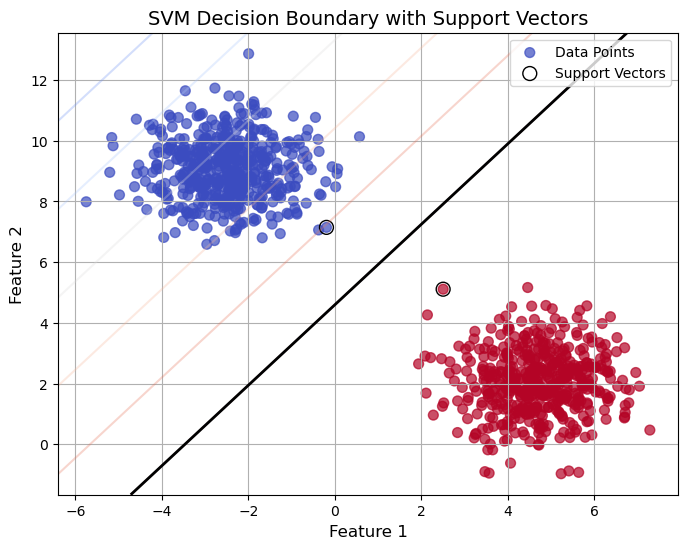

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

data, labels = make_blobs(n_samples=1000,random_state=42,centers=2)

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)

# Train an SVM classifier
svm_model = SVC(kernel="linear", random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)
# print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plotting the decision boundary
plt.figure(figsize=(8, 6))

# Scatter the original data
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap="coolwarm", s=50, alpha=0.7, label="Data Points")

# Plot the decision boundary
ax = plt.gca()
x_limit = ax.get_xlim()
y_limit = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(x_limit[0], x_limit[1], 100), np.linspace(y_limit[0], y_limit[1], 100))
Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z.shape
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap="coolwarm", alpha=0.3)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="black")

# Plot support vectors
plt.scatter(
    svm_model.support_vectors_[:, 0],
    svm_model.support_vectors_[:, 1],
    s=100,
    facecolor="none",
    edgecolors="k",
    label="Support Vectors",
)

plt.title("SVM Decision Boundary with Support Vectors", fontsize=14)
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()